<a href="https://colab.research.google.com/github/vineet-codes/ai-notebooks/blob/main/fastai_vision_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First thing, we need to install fastai bibrary

In [1]:
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

     |████████████████████████████████| 194kB 31.8MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 


In [2]:
from fastai.vision.all import *


we need to get/download data. How do we do this in collab ? 



In [3]:
path = untar_data(URLs.PETS)

In [8]:
files = get_image_files(path/"images")

In [9]:
len(files)

7390

In [10]:
files[0],files[6], files[600]

(Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_181.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_240.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_171.jpg'))

## Cats and Dogs

Get labels for data

Cats have lowercase alphabet as first character. Dogs have capital as its first character.

In [11]:
# Dogs will get label 1, Cats will get label 0
def label_func(f): return f[0].isupper()

In [12]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

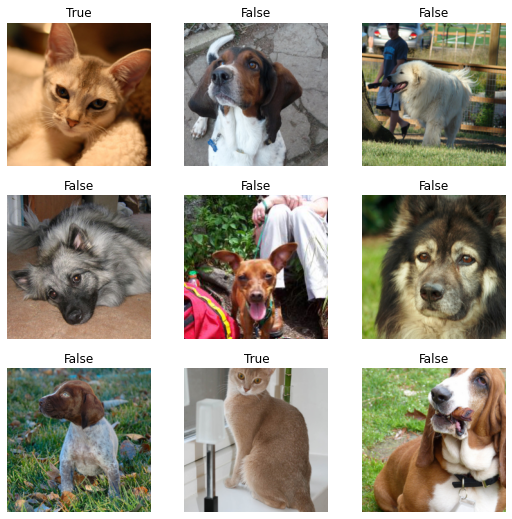

In [13]:
dls.show_batch()

In [14]:
learner = cnn_learner(dls, resnet18, metrics=error_rate)
learner.fit(1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,0.085097,0.018498,0.010149,00:43


In [17]:
learner.dls.train.dataset[0]

(PILImage mode=RGB size=500x375, TensorCategory(0))

In [18]:
learner.predict(files[0])

('False', tensor(0), tensor([9.9984e-01, 1.6214e-04]))

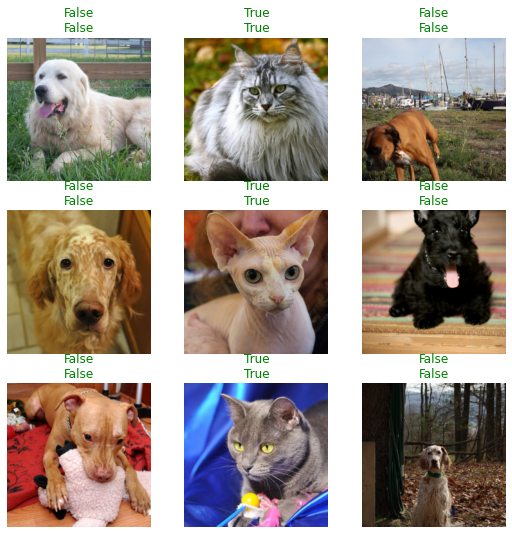

In [19]:
learner.show_results()

## Classifying Breeds

In [23]:
files[0].name, files[200].name, files[400].name

('japanese_chin_181.jpg', 'Maine_Coon_21.jpg', 'Bengal_58.jpg')

In [24]:
pat = r'^(.*)_\d+.jpg'

In [25]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

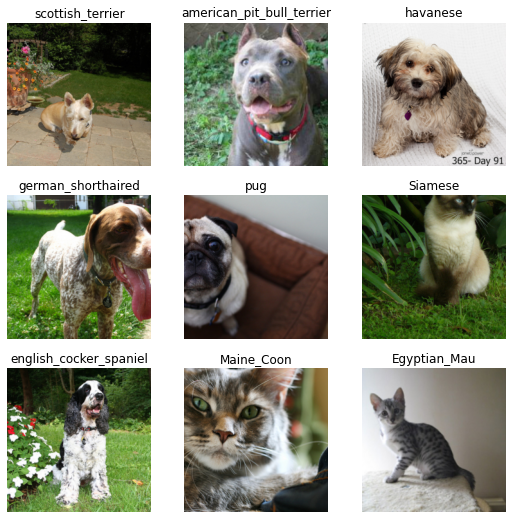

In [26]:
dls.show_batch()

Dataloader with data_augmentation

In [27]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


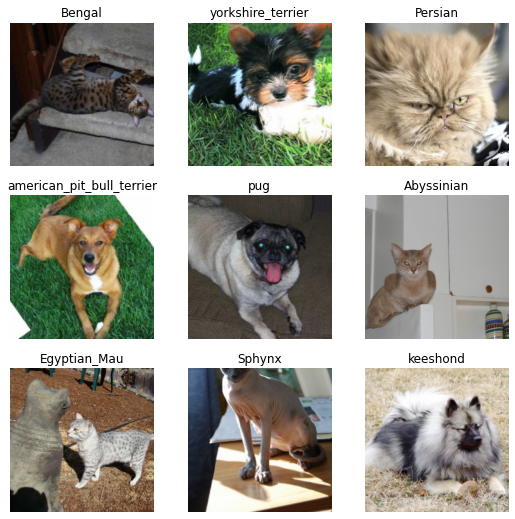

In [28]:
dls.show_batch()

In [35]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Finding a learning rate

SuggestedLRs(valley=0.0004786300996784121)

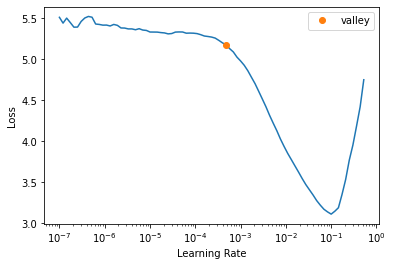

In [36]:
learn.lr_find()

In [37]:
learn.fine_tune(2, 1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.953681,0.399887,0.116373,01:08


epoch,train_loss,valid_loss,error_rate,time
0,1.037476,0.900535,0.225981,01:11
1,0.553552,0.334607,0.111637,01:11


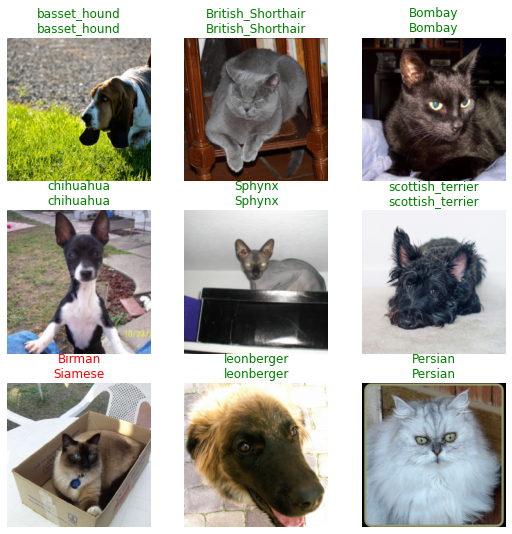

In [32]:
learn.show_results()

In [33]:
interp = Interpretation.from_learner(learn)

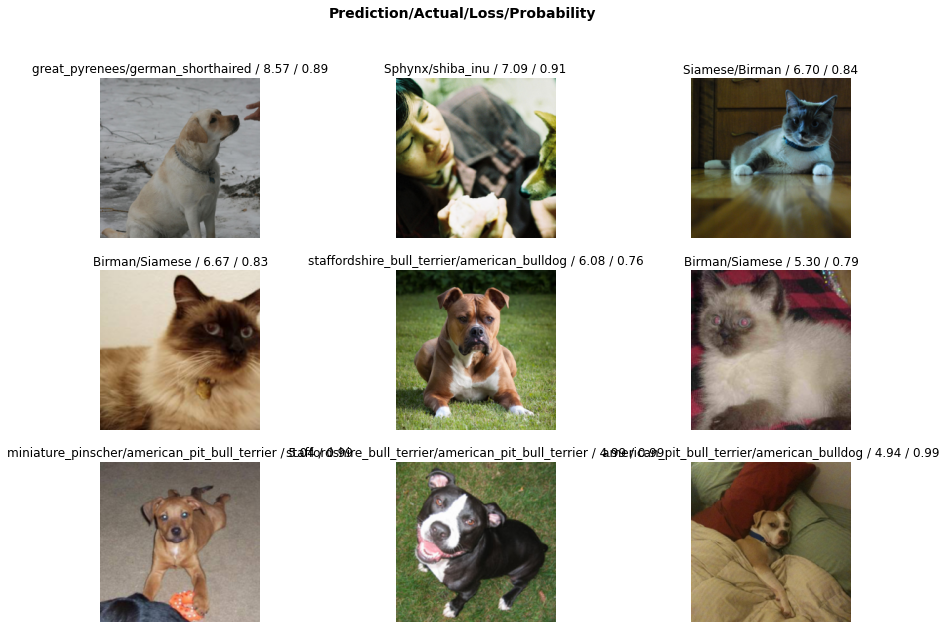

In [34]:
interp.plot_top_losses(9, figsize=(15,10))